In [1]:
using prony

In [2]:
# construct your time domain data from an analytical spectral function
# Here I use the BO funciton defined in `spectral.jl`, where the parameters `λ`, `ζ`, and `ΩB` are default value
# you can easily define an partial function that has different parameter sets
# BO_not_default = ω -> BO(ω; λ=your_λ, ζ=your_ζ, ΩB=your_ΩB)
β = 1.0 / 10
data = TimeDomainData(BO, bose_function, β; tf=100)

# choose numbers of exponential decays you want to use to decompose the spectral function
# real for the the real part of the correlation function (TimeDomainData); imag for imaginary part of TimeDomainData.
nmode_real = 1
nmode_imag = 2

# the fitting process, returns the exponents and the corrsponding η coefficients
expn, etal = prony_fitting(data, nmode_real, nmode_imag)

# comparison between the exact correlation spectra and exponential decompsed one
len_ = 10000
spe_wid = 10
ω = range(-spe_wid, spe_wid, len_)

jw_exact = @. BO(ω) * bose_function(ω; β=β)
jw_prony = real(get_correlation_spectra_from_exponentials(collect(ω), expn, etal))

devi = jw_exact - jw_prony
println("The maximum difference is $(maximum(abs.(devi)))")

[ Info: Staring the prony fitting program.
[ Info: Building the Hankel matrix and running Takagi factorization...
[ Info: The Hankel process is done!
[ Info: <Hankel dim=1000, with Takagi factorization error (real: 1.3302774490885926e-9, imag: 1.365807486216953e-10)>
[ Info: Solving for the gamma values from the eigen values...
┌ Info:     The gamma and t values are solved!
│     - gamma: ComplexF64[0.9253892619008989 + 8.023651941764368e-23im, 0.9743957018446489 - 0.04221896170684058im, 0.9743957018446495 + 0.04221896170684114im]; 
└     -t: ComplexF64[-155.0816126290282 + 1.7341139068941632e-19im, -49.99999999977347 - 86.60254037851898im, -49.999999999772044 + 86.60254037852008im].
[ Info: Preparing the matrices for Prony optimization...
[ Info: Start the minimization...
[ Info: Minimization done, now outputting decomposed correlation function.
┌ Info: 
│     Time elapsed
│     - Hankel matrix and Takagi factorization: 0.4417 seconds.
│     - calculate the gamma and t by finding the 

The maximum difference is 1.592280383011513e-5
     pcost       dcost       gap    pres   dres
 0: -4.8728e+02 -1.1135e+03  1e+04  6e+01  3e+00
 1: -1.5249e+03 -2.9528e+03  6e+03  3e+01  1e+00
 2: -3.8259e+03 -6.0220e+03  4e+03  1e+01  4e-01
 3: -4.0356e+03 -4.3021e+03  3e+02  2e-01  1e-02
 4: -4.0978e+03 -4.1255e+03  3e+01  5e-03  2e-04
 5: -4.1071e+03 -4.1108e+03  4e+00  8e-05  3e-06
 6: -4.1081e+03 -4.1094e+03  1e+00  3e-05  1e-06
 7: -4.1082e+03 -4.1091e+03  9e-01  2e-05  8e-07
 8: -4.1085e+03 -4.1086e+03  1e-01  2e-07  8e-09
 9: -4.1085e+03 -4.1085e+03  9e-03  9e-14  7e-15
10: -4.1085e+03 -4.1085e+03  4e-04  8e-14  3e-14
11: -4.1085e+03 -4.1085e+03  7e-06  9e-14  2e-14
12: -4.1085e+03 -4.1085e+03  8e-08  8e-14  2e-16
13: -4.1085e+03 -4.1085e+03  1e-09  8e-14  8e-17
14: -4.1085e+03 -4.1085e+03  1e-10  8e-14  6e-17
15: -4.1085e+03 -4.1085e+03  9e-12  6e-14  1e-16
16: -4.1085e+03 -4.1085e+03  1e-13  8e-14  1e-16
17: -4.1085e+03 -4.1085e+03  1e-15  8e-14  1e-16
18: -4.1085e+03 -4.1085

In [3]:
using Plots

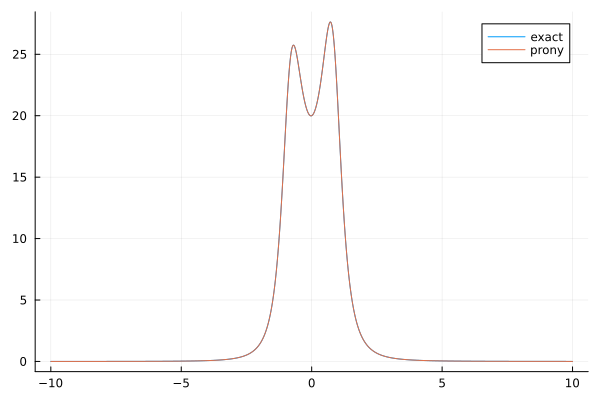

In [4]:
plt = plot()
plot!(plt, ω, jw_exact, label="exact")
plot!(plt, ω, jw_prony, label="prony")

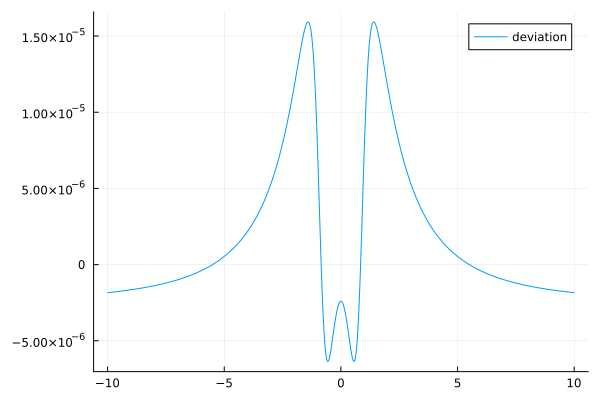

In [5]:
plot(ω, devi, label="deviation")